# Getting Started

In this project, We will analyze datasets containing data on restaurants, consumers and user-item-rating. The goal of this project is to implement Collaborative Filtering i.e., to find similarities between various consumers and recommend restaurants to consumers.

The datasets for this project can be found on [Kaggle](https://www.kaggle.com/uciml/restaurant-data-with-consumer-ratings). 

The following code loads the datasets, along with a few of the necessary Python libraries required for this project.

In [2]:
# Import libraries necessary for this project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display # Allows the use of display() for DataFrames

# Pretty display for notebooks
%matplotlib inline

print('Loading restaurant datasets')

# Load Restaurant Payment dataset
try:
    rest_pay = pd.read_csv('chefmozaccepts.csv')
    print('Payment dataset has %d samples with %d features each.' % (rest_pay.shape))
except:
    print('Payment dataset could not be loaded. Is the dataset missing?')
    
# Load the Restaurant Cuisine dataset
try:
    rest_cuisine = pd.read_csv('chefmozcuisine.csv')
    print('Cuisine dataset has %d samples with %d features each.' % (rest_cuisine.shape))
except:
    print('Cuisine dataset could not be loaded. Is the dataset missing?')
    
# Load the Restaurant Hours dataset
try:
    rest_hours = pd.read_csv('chefmozhours4.csv')
    print('Hours dataset has %d samples with %d features each.' % (rest_hours.shape))
except:
    print('Hours dataset could not be loaded. Is the dataset missing?')
    
# Load the Restaurant Parking dataset
try:
    rest_parking = pd.read_csv('chefmozparking.csv')
    print('Parking dataset has %d samples with %d features each.' % (rest_parking.shape))
except:
    print('Parking dataset could not be loaded. Is the dataset missing?')

#Load Restaurant Geo-places dataset
try:
    rest_geo = pd.read_csv('geoplaces2.csv')
    print('Geo-places dataset has %d samples with %d features each.' % (rest_geo.shape))
except:
    print('Geo-places dataset could not be loaded. Is the dataset missing?')

print('\n')

print('Loading consumer datasets')

# Load the Consumer Cuisine dataset
try:
    cons_cuisine = pd.read_csv('usercuisine.csv')
    print('Cuisine dataset has %d samples with %d features each.' % (cons_cuisine.shape))
except:
    print('Cuisine dataset could not be loaded. Is the dataset missing?')

#Load Consumer Payment dataset
try:
    cons_pay = pd.read_csv('userpayment.csv')
    print('Payment dataset has %d samples with %d features each.' % (cons_pay.shape))
except:
    print('Payment dataset could not be loaded. Is the dataset missing?')

#Load Consumer Profile dataset
try:
    cons_profile = pd.read_csv('userprofile.csv')
    print('Profile dataset has %d samples with %d features each.' % (cons_profile.shape))
except:
    print('Profile dataset could not be loaded. Is the dataset missing?')
    
print('\n')

print('Loading User-Item-Rating dataset')

#Load Rating dataset
try:
    rating = pd.read_csv('rating_final.csv')
    print('Rating dataset has %d samples with %d features each.' % (rating.shape))
except:
    print('Rating dataset could not be loaded. Is the dataset missing?')
    


Loading restaurant datasets
Payment dataset has 1314 samples with 2 features each.
Cuisine dataset has 916 samples with 2 features each.
Hours dataset has 2339 samples with 3 features each.
Parking dataset has 702 samples with 2 features each.
Geo-places dataset has 130 samples with 21 features each.


Loading consumer datasets
Cuisine dataset has 330 samples with 2 features each.
Payment dataset has 177 samples with 2 features each.
Profile dataset has 138 samples with 19 features each.


Loading User-Item-Rating dataset
Rating dataset has 1161 samples with 5 features each.


# Data Exploration

In this section, we will begin exploring the data through visualizations and code to understand how features of each dataset are related to one another.

Resturant datasets:<br>
1. rest_pay: 'placeID', 'Rpayment'<br>
2. rest_cuisine: 'placeID', 'Rcuisine' <br>
3. rest_hours: 'placeID', 'hours', 'days' <br>
4. rest_parking: 'placeID', 'parking_lot' <br>
5. rest_geo: 'placeID', 'latitude', 'longitude', 'the_geom_meter', 'name', 'address','city', 'state', 'country', 'fax', 'zip', 'alcohol', 'smoking_area','dress_code', 'accessibility', 'price', 'url', 'Rambience', 'franchise','area', 'other_services'<br>

User datasets:<br>
1. cons_pay: 'userID', 'Upayment'<br>
2. cons_cuisine: 'userID', 'Rcuisine'<br>
3. cons_profile: 'userID', 'latitude', 'longitude', 'smoker', 'drink_level', 'dress_preference', 'ambience', 'transport', 'marital_status', 'hijos', 'birth_year', 'interest', 'personality', 'religion', 'activity', 'color', 'weight', 'budget', 'height' <br>

Rating dataset:
1. rating: 'userID', 'placeID', 'rating', 'food_rating', 'service_rating'


In [3]:
#No.of users who are given ratings to the restaurants
list_users = rating.userID.unique()
print(len(list_users))

138


In [4]:
#Delete users from cons_profile who have not given ratings
for index, row in cons_profile.iterrows():
    if row['userID'] not in list_users:
        del row

In [5]:
#Merge all the restaurant dataframes into one
from functools import reduce
df = [rest_pay,rest_cuisine,rest_hours,rest_parking,rest_geo]
rest_final = reduce(lambda left,right: pd.merge(left,right,on='placeID'), df)
print(rest_final.columns)

#Merge all the user dataframes into one
df = [cons_pay,cons_cuisine,cons_profile]
cons_final = reduce(lambda left,right: pd.merge(left,right,on='userID'), df)
print(cons_final.columns)

Index(['placeID', 'Rpayment', 'Rcuisine', 'hours', 'days', 'parking_lot',
       'latitude', 'longitude', 'the_geom_meter', 'name', 'address', 'city',
       'state', 'country', 'fax', 'zip', 'alcohol', 'smoking_area',
       'dress_code', 'accessibility', 'price', 'url', 'Rambience', 'franchise',
       'area', 'other_services'],
      dtype='object')
Index(['userID', 'Upayment', 'Rcuisine', 'latitude', 'longitude', 'smoker',
       'drink_level', 'dress_preference', 'ambience', 'transport',
       'marital_status', 'hijos', 'birth_year', 'interest', 'personality',
       'religion', 'activity', 'color', 'weight', 'budget', 'height'],
      dtype='object')


In [6]:
#Remove features which are not useful for recommendation
rest_final = rest_final.drop(['url'], axis = 1) #not useful as most of the values are '?'
rest_final = rest_final.drop(['fax'], axis = 1) #all the values are '?'
rest_final = rest_final.drop(['country','state','city','zip','address'], axis = 1) #Not useful as we can directly
                                                                                   #use latitudes and logitudes

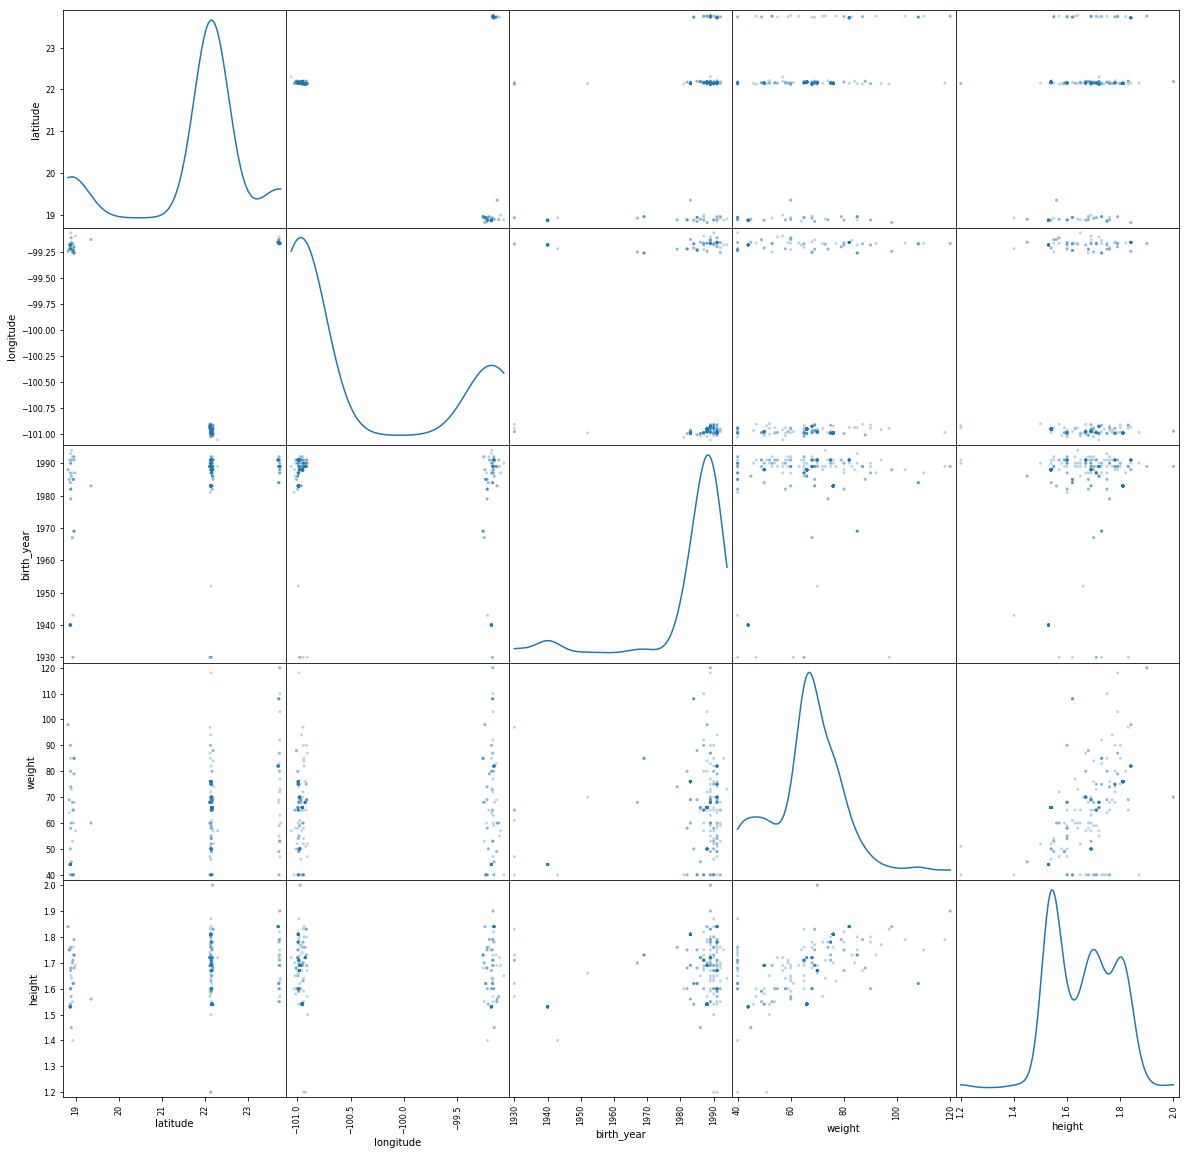

In [7]:
#Scatter matrix for continuous values in the user dataset
pd.plotting.scatter_matrix(cons_final, alpha = 0.3, figsize = (20,20), diagonal = 'kde');
#From the graph below, we know that there's a correlation between weight and height and therefore we can remove one of them.

In [8]:
# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()
# cons_profile['smoker'] = le.fit_transform(cons_profile['smoker'])
# cons_profile['drink_level'] = le.fit_transform(cons_profile['drink_level'])
# cons_profile['dress_preference'] = le.fit_transform(cons_profile['dress_preference'])
# cons_profile['ambience'] = le.fit_transform(cons_profile['ambience'])
# cons_profile['transport'] = le.fit_transform(cons_profile['transport'])
# cons_profile['marital_status'] = le.fit_transform(cons_profile['marital_status'])
# cons_profile['hijos'] = le.fit_transform(cons_profile['hijos'])
# cons_profile['interest'] = le.fit_transform(cons_profile['interest'])
# cons_profile['personality'] = le.fit_transform(cons_profile['personality'])
# cons_profile['religion'] = le.fit_transform(cons_profile['religion'])
# cons_profile['activity'] = le.fit_transform(cons_profile['activity'])
# cons_profile['color'] = le.fit_transform(cons_profile['color'])
# cons_profile['budget'] = le.fit_transform(cons_profile['budget'])

## Checking if dataset contains missing values
- The code below gives True if any of the attributes contain missing values 

In [11]:
a = rest_final.isin(['?']).any()
print(f'Restaurant:\n{a}\n\nCustomer:')
print(cons_final.isin(['?']).any())

Restaurant:
placeID           False
Rpayment          False
Rcuisine          False
hours             False
days              False
parking_lot       False
latitude          False
longitude         False
the_geom_meter    False
name              False
alcohol           False
smoking_area      False
dress_code        False
accessibility     False
price             False
Rambience         False
franchise         False
area              False
other_services    False
dtype: bool

Customer:
userID              False
Upayment            False
Rcuisine            False
latitude            False
longitude           False
smoker              False
drink_level         False
dress_preference     True
ambience             True
transport            True
marital_status       True
hijos                True
birth_year          False
interest            False
personality         False
religion            False
activity             True
color               False
weight              False
budget         